# Question 1

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def mb(z,c):
    f = z**2 + c
    return z

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


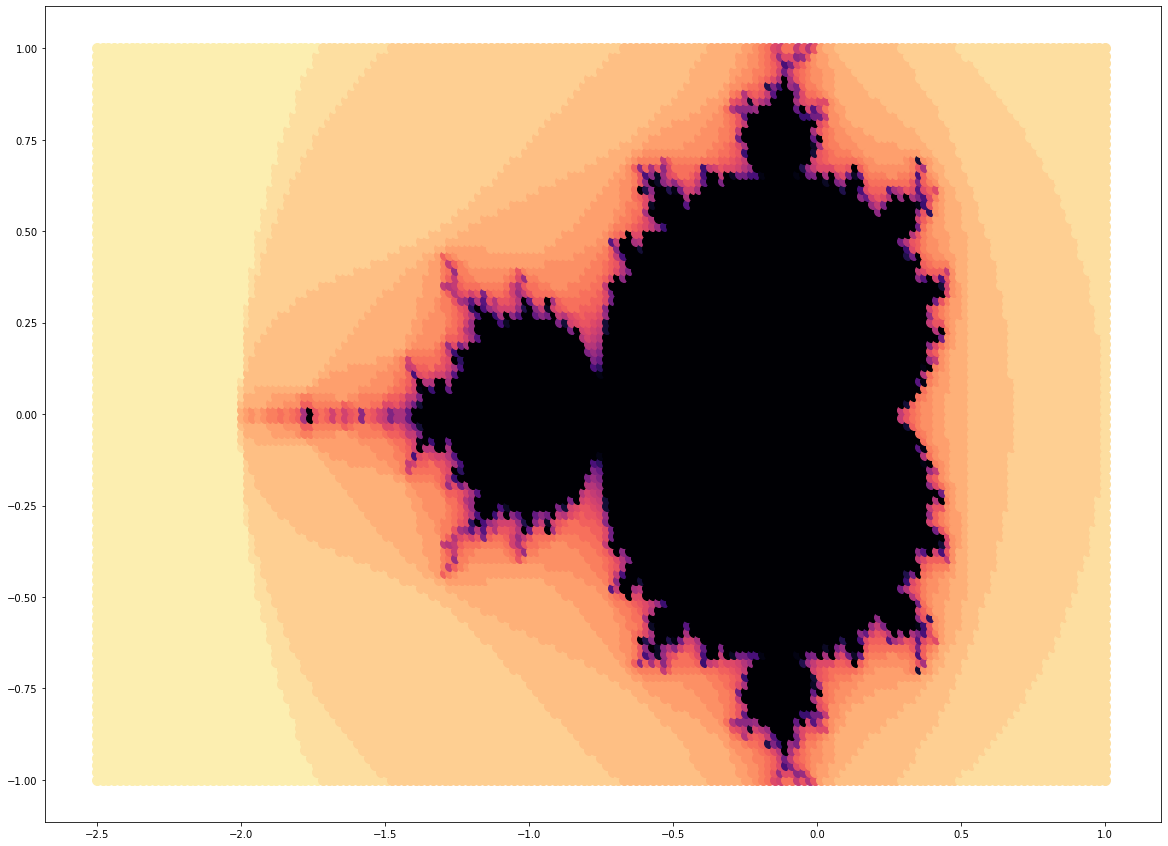

In [3]:
points=100
max_iteration = 30
colors = plt.cm.magma_r(np.linspace(0, 1, max_iteration+1))
fig=plt.figure(figsize=(20,15))

z = 0
xline = np.linspace(-2.5,1, points*1.75)
yline = np.linspace(-1,1, points)
index=0
for i in xline:
    for j in yline:
        x = 0.0
        y = 0.0
        iteration = 0
        while(x*x + y*y <= 2*2 and iteration < max_iteration):
            xtemp = x*x - y*y + i
            y = 2*x*y + j
            x = xtemp 
            iteration+=1
            
        #col = (iteration / max_iteration)        
        plt.scatter(i,j, color = colors[iteration], norm=mpl.colors.LogNorm(), s=100)   


# Question 2

In [24]:
#First, let's sample a random (x,y) coordinate pair:

def make_samples(N, xMin=-2, xMax=1, yMin=-1, yMax=1):
    x = np.random.uniform(xMin, xMax, N)
    y = np.random.uniform(yMin, yMax, N)
    samples = np.array([x, y])
    return samples.T                                   #Transpose, such that we can index on coordinate pairs easily




array([-0.98000873, -0.59237628])

In [28]:
def mandelbrot_area(i,j, max_iteration):
    x = 0.0
    y = 0.0
    iteration = 0
    while(x*x + y*y <= 2*2 and iteration < max_iteration):
        xtemp = x*x - y*y + i
        y = 2*x*y + j
        x = xtemp 
        iteration+=1
    if (iteration == max_iteration):
        return True
    else:
        return False

In [235]:
def Monte_Carlo_Area(samplesize, max_iterations, TOTAL_AREA):
    samples = make_samples(S)
    area = []
    for i in samples:
        x = mandelbrot_area(i[0], i[1], max_iterations)
        area.append(x)

    #Let's see the proportion of Trues to Falses:
    ones = np.ones(S)
    ones = ones[area]                             #Boolean indexing

    total = np.sum(ones)
    area = (total/S) * TOTAL_AREA                 #proportion of True to False, multiplied by area of entire square.
    return area


In [242]:
TOTAL_AREA = 3*2
S = 10000
MAX_ITERATIONS = 100

ar = Monte_Carlo_Area(S,MAX_ITERATIONS, TOTAL_AREA)
print("So estimated Area of the Mandelbrot Island is: ", ar)



So estimated Area of the Mandelbrot Island is:  1.578
